<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [11]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv('./data/job_listings.csv')
nlp = spacy.load("en_core_web_sm")
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [12]:
df['cleaned_description'] = df['description'].apply(lambda x: BeautifulSoup(x)
                                                   .get_text(strip=True)
                                                   .replace('\\n', ' ')
                                                   .replace("b\''", '')
                                                   .replace('b"', '')
                                                   .replace("b'", ''))
        

In [13]:
df['cleaned_description'][0]

'Job Requirements: Conceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"'

In [14]:
df.head()

,Unnamed: 0,description,title,cleaned_description
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in ...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you wi..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations ...


In [15]:
df['description'][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

## 2) Use Spacy to tokenize the listings 

In [16]:
# remove any non alpha numeric characters
df['cleaned_description'] = df['cleaned_description'].apply(lambda x: re.sub('[^a-zA-Z 0-9]', ' ', x.lower()))

In [17]:
df.head()

,Unnamed: 0,description,title,cleaned_description
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,job requirements conceptual understanding in ...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,job description as a data scientist 1 you wi...
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,as a data scientist you will be working on con...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,4 969 6 756 a monthcontractunder the gener...
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,location usa xe2 x80 x93 multiple locations ...


In [18]:
df.cleaned_description[0]

'job requirements  conceptual understanding in machine learning models like nai xc2 xa8ve bayes  k means  svm  apriori  linear  logistic regression  neural  random forests  decision trees  k nn along with hands on experience in at least 2 of them intermediate to expert level coding skills in python r   ability to write functions  clean and efficient data manipulation are mandatory for this role  exposure to packages like numpy  scipy  pandas  matplotlib etc in python or ggplot2  dplyr  tidyr in r ability to communicate model findings to both technical and non technical stake holders hands on experience in sql hive or similar programming language must show past work via github  kaggle or any other published article master s degree in statistics mathematics computer science or any other quant specific field  apply now '

In [19]:
add_stop_words = ['data', 'scientist', 'job', 'requirements', 'requirement', 'require',
                 'work', 'location', 'understanding', 'description', 'learning', 'science',
                 'model', 'like', 'machine', 'year', 's', 'apply', 'large', 'use', 'skill',
                 'skills', 'include', 'need', 'help', 'overview', 'experience']

In [20]:
df['tokens'] = [nlp(text) for text in df['cleaned_description']]
df['tokens'] = [[token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]
               for doc in df['tokens']]

In [21]:
df.head()

,Unnamed: 0,description,title,cleaned_description,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,job requirements conceptual understanding in ...,"[job, requirement, , conceptual, understandin..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,job description as a data scientist 1 you wi...,"[job, description, , data, scientist, 1, , h..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,as a data scientist you will be working on con...,"[data, scientist, work, consult, business, , ..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,4 969 6 756 a monthcontractunder the gener...,"[ , 4, 969, , 6, 756, monthcontractunder, g..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,location usa xe2 x80 x93 multiple locations ...,"[location, , usa, , xe2, x80, x93, multiple,..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [22]:
count_vect = CountVectorizer(max_df=.97,
                             min_df=.05,
                            stop_words='english')
count_vect.fit(df['cleaned_description'])
dtm = count_vect.transform(df['cleaned_description'])

dtm = pd.DataFrame(dtm.todense(), columns=count_vect.get_feature_names())

In [23]:
df['tokens']

0      [job, requirement,  , conceptual, understandin...
1      [job, description,  , data, scientist, 1,  , h...
2      [data, scientist, work, consult, business,  , ...
3      [ , 4, 969,    , 6, 756, monthcontractunder, g...
4      [location,  , usa,  , xe2, x80, x93, multiple,...
                             ...                        
421    [ , want, fantastic, fun, startup, xe2, x80, x...
422    [internshipat, uber,  , ignite, opportunity, s...
423    [ , 200, 000,    , 350, 000, yeara, million, p...
424    [senior, data, scientist, job, description,  ,...
425    [cerner, intelligence, new,  , innovative, org...
Name: tokens, Length: 426, dtype: object

In [26]:
df['word_count'] = df['tokens'].apply(lambda x: len(x))

In [27]:
df.head()

,Unnamed: 0,description,title,cleaned_description,tokens,word_count
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,job requirements conceptual understanding in ...,"[job, requirement, , conceptual, understandin...",111
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,job description as a data scientist 1 you wi...,"[job, description, , data, scientist, 1, , h...",451
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,as a data scientist you will be working on con...,"[data, scientist, work, consult, business, , ...",96
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,4 969 6 756 a monthcontractunder the gener...,"[ , 4, 969, , 6, 756, monthcontractunder, g...",203
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,location usa xe2 x80 x93 multiple locations ...,"[location, , usa, , xe2, x80, x93, multiple,...",29


## 4) Visualize the most common word counts

In [28]:
dtm.head()

,000,10,100,2019,40,abilities,ability,able,academic,access,...,x99,x99ll,x99re,x99s,x99t,x9d,xe2,year,years,york
0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,2,0,2,2,0,0,8,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Text(0.5, 1.0, 'Top 10 most common keywords')

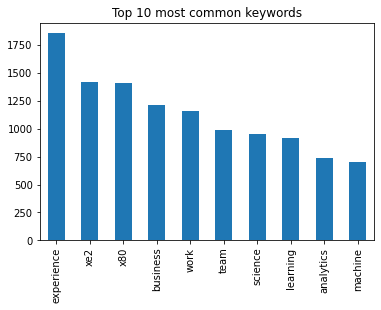

In [31]:
dtm.sum().sort_values(ascending=False)[:10].plot.bar()
plt.title('Top 10 most common keywords')

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [44]:
##### Your Code Here #####
tfidf = TfidfVectorizer(stop_words='english',
                       min_df=0.10,
                       max_df=0.70)

dtm = tfidf.fit_transform(df['cleaned_description'])

In [45]:
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,ability,able,access,achieve,action,actionable,ad,additional,address,advanced,...,world,writing,written,x93,x99,x99ll,x99re,x99s,year,years
0,0.195471,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.035516,0.0,0.0,0.0,0.00000,0.000000,0.0,0.063475,0.0,0.000000,...,0.07807,0.140941,0.050339,0.000000,0.124481,0.0,0.134521,0.070292,0.068809,0.000000
2,0.092294,0.0,0.0,0.0,0.00000,0.156518,0.0,0.000000,0.0,0.109931,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.12571,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.128604,0.000000
4,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.369072,0.000000,0.0,0.000000,0.000000,0.000000,0.181675


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [49]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

fake = ['please know how to code. that is all']
test = tfidf.transform(fake)
nn.kneighbors(test.todense())

(array([[1.18659479, 1.18659479, 1.25365211, 1.26922956, 1.30108835]]),
 array([[123,  23, 106, 169, 102]]))

In [50]:
df['cleaned_description'][123]

'motiion is a technology and data company for the food industry  we believe in transparency  diversity  merit and fostering a culture of accountability  personal impact and career growth   as a member of the first product engineering team at motiion you have will have a unique opportunity to turning previously scattered and inconsistently structured data into directly actionable food industry insights to reduce waste  increase freshness and much more   you have a proven track record of reading data and making solid conclusions  you know both the artandscience of analytics   now only do you know how to find answers in the data  you also know which questions should be asked in the first place and what data might could help us further bolster our conclusions  you love engaging with customers  learn about their challenges and then dive into the data to see how to solve them   we are building a product engineering team with a breadth of combined experiences so that we can collaboratively bu

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 